# ASSIGNMENT PROJECT | GRUPPO 2 - POLIMI : 

## Heart Failure Prediction Dataset - ANALYSIS 🩸

**Dataset Link and Description** `Heart Failure Prediction Dataset` [here](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) 👈

In [1]:
#import Python Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print('Dataset size:', df.shape)

Dataset size: (918, 12)


## 1.  `EDA (Exploratory Data Analysis)`

In [4]:
#Check for duplicates:

duplicate_count = len(df)-len(df.drop_duplicates()) # Original data length (n. rows) - data length without duplicates

duplicate_count # 0 duplicate rows, OK!

0

In [5]:
#Check for Missing Values:

df.isnull().sum().sort_values(ascending=False)/len(df) # 0 missing values (Nan), OK!

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [6]:
#Target (y) balance:

df['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [7]:
#Main Statistics:

df.describe() 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
#Column data types:

df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

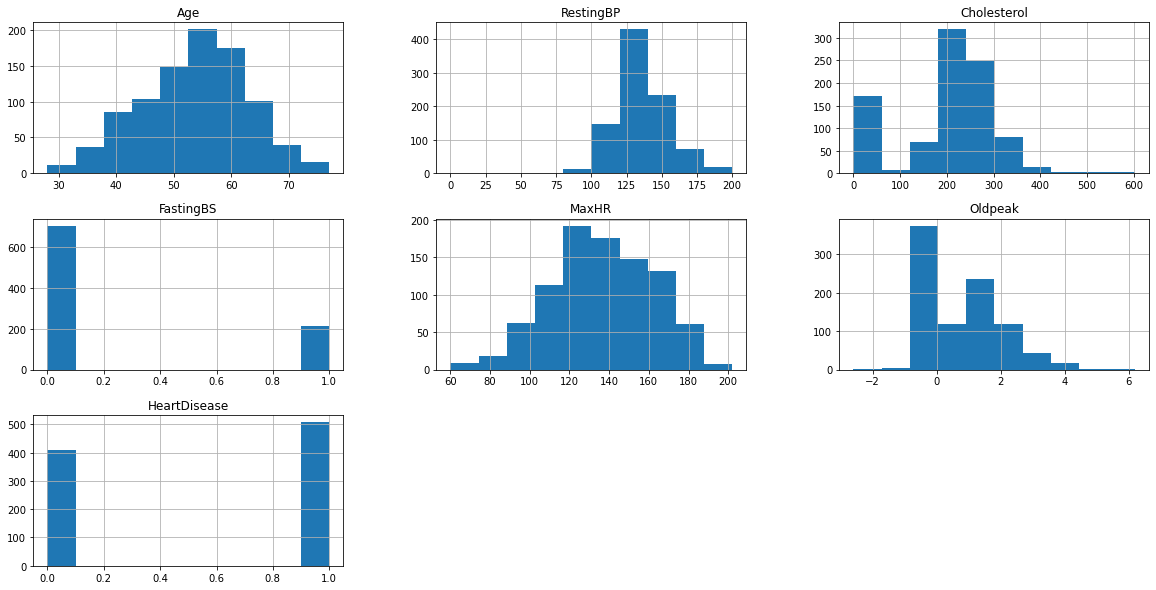

In [9]:
#Data Visualization: Distribution of each feature: (Histogram)

df.hist(figsize=(20,10))

plt.show() 

# 2. `Scaling Data`

In [10]:
# We'll use a Standard scaling technique to scale our numerical features:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #instanciate Standardscaler()

df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] =  scaler.fit_transform(df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']]) 

In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,0,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,0,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,0,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,0,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,0,Normal,-0.581981,N,-0.832432,Up,0


# 3. `Encoding Categorical Features`

In [12]:
# 'Let's check whether our categorical features are binary or mutlicategorical:

In [13]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [14]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [15]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [16]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [17]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

### Binary Encoding:

In [18]:
#Sex column is binary, we'll just replace values with 0 and 1:

df['Sex'].replace("M", 0, inplace=True) 
df['Sex'].replace("F", 1, inplace=True) 

In [19]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0,ATA,0.410909,0.825070,0,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,1,NAP,1.491752,-0.171961,0,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,0,ATA,-0.129513,0.770188,0,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,1,ASY,0.302825,0.139040,0,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,0,NAP,0.951331,-0.034755,0,Normal,-0.581981,N,-0.832432,Up,0


In [20]:
#ExerciseAngina is binary as well:

df['ExerciseAngina'].replace("N", 0, inplace=True) 
df['ExerciseAngina'].replace("Y", 1, inplace=True) 

In [21]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,0,ATA,0.410909,0.825070,0,Normal,1.382928,0,-0.832432,Up,0
1,-0.478484,1,NAP,1.491752,-0.171961,0,Normal,0.754157,0,0.105664,Flat,1
2,-1.751359,0,ATA,-0.129513,0.770188,0,ST,-1.525138,0,-0.832432,Up,0
3,-0.584556,1,ASY,0.302825,0.139040,0,Normal,-1.132156,1,0.574711,Flat,1
4,0.051881,0,NAP,0.951331,-0.034755,0,Normal,-0.581981,0,-0.832432,Up,0


### One-Hot Encoding:

In [22]:
# 'ChestPainType' is multicategorical so we'll use the One-Hot Encoding technique:

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False) # Instanciate One hot encoder, "sparse" -> Will return sparse matrix if set True else will return an array

# Put encoded columns back in dataframe (remember: ndarray.T, The transposed array)

df['ATA'],df['NAP'],df['ASY'],df['TA']  = ohe.fit_transform(df[['ChestPainType']]).T 

df.drop(columns=['ChestPainType'], inplace = True) # Drop original column


In [23]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,ASY,TA
0,-1.433140,0,0.410909,0.825070,0,Normal,1.382928,0,-0.832432,Up,0,0.0,1.0,0.0,0.0
1,-0.478484,1,1.491752,-0.171961,0,Normal,0.754157,0,0.105664,Flat,1,0.0,0.0,1.0,0.0
2,-1.751359,0,-0.129513,0.770188,0,ST,-1.525138,0,-0.832432,Up,0,0.0,1.0,0.0,0.0
3,-0.584556,1,0.302825,0.139040,0,Normal,-1.132156,1,0.574711,Flat,1,1.0,0.0,0.0,0.0
4,0.051881,0,0.951331,-0.034755,0,Normal,-0.581981,0,-0.832432,Up,0,0.0,0.0,1.0,0.0


In [24]:
# 'RestingECG' column is categorical as well:

ohe2 = OneHotEncoder(sparse=False)


df['Normal'], df['ST'], df['LVH']= ohe2.fit_transform(df[['RestingECG']]).T 

df.drop(columns=['RestingECG'], inplace = True)


In [25]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ATA,NAP,ASY,TA,Normal,ST,LVH
0,-1.433140,0,0.410909,0.825070,0,1.382928,0,-0.832432,Up,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.478484,1,1.491752,-0.171961,0,0.754157,0,0.105664,Flat,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.751359,0,-0.129513,0.770188,0,-1.525138,0,-0.832432,Up,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.584556,1,0.302825,0.139040,0,-1.132156,1,0.574711,Flat,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.051881,0,0.951331,-0.034755,0,-0.581981,0,-0.832432,Up,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [26]:
# 'ST_Slope' is also multicategorical:

ohe3 = OneHotEncoder(sparse=False) 

df['Up'], df['Flat'], df['Down']= ohe3.fit_transform(df[['ST_Slope']]).T 

df.drop(columns=['ST_Slope'], inplace = True) 


In [27]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ATA,NAP,ASY,TA,Normal,ST,LVH,Up,Flat,Down
0,-1.433140,0,0.410909,0.825070,0,1.382928,0,-0.832432,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.478484,1,1.491752,-0.171961,0,0.754157,0,0.105664,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.751359,0,-0.129513,0.770188,0,-1.525138,0,-0.832432,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.584556,1,0.302825,0.139040,0,-1.132156,1,0.574711,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.051881,0,0.951331,-0.034755,0,-0.581981,0,-0.832432,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


##  4. `Multicollinearity Test:`

### Correlation Matrix (Heatmap of the Pearson Correlation between the dataset columns):

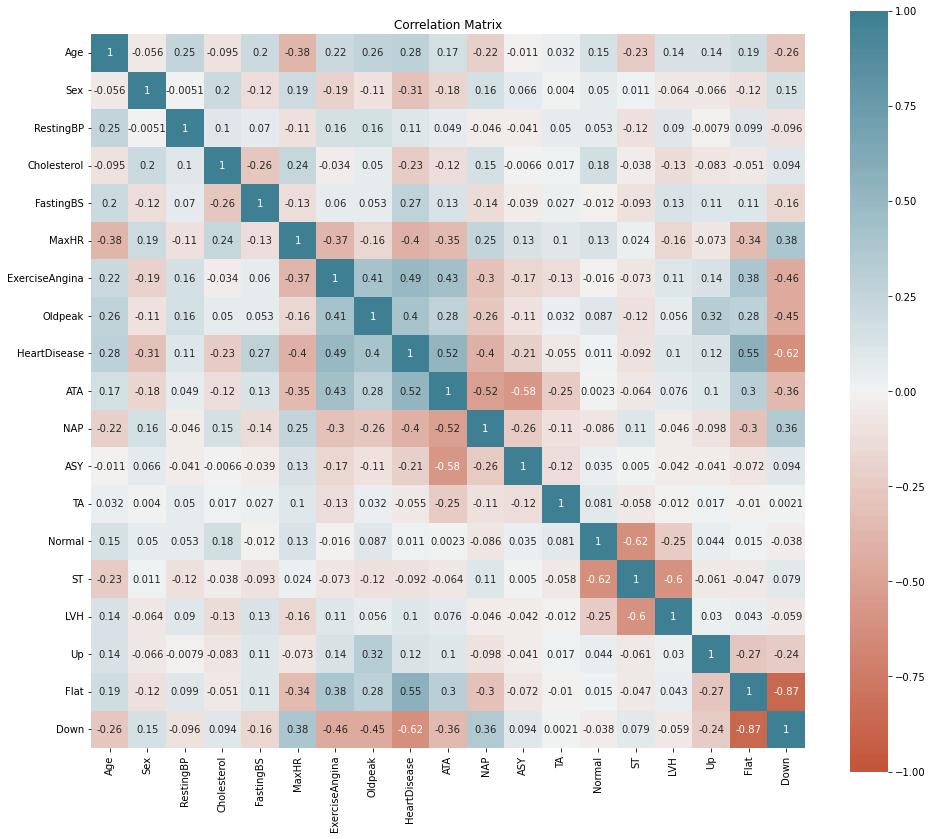

In [28]:
corr = df.corr() # Pearson Correlation

plt.figure(figsize=(16, 14))

# Heatmap

sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, annot=True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

plt.title('Correlation Matrix')

plt.show()

In [29]:
# Visualize the correlation between column pairs in a dataframe:

corr_df = corr.stack().reset_index()  #stack()

corr_df.columns = ['feature_1','feature_2', 'correlation'] # rename columns

corr_df.sort_values(by="correlation",ascending=False, inplace=True) # sort by correlation

corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] # Remove self correlation

corr_df.head(10) #We don't have high correlation between our features, OK!

,feature_1,feature_2,correlation
331,Flat,HeartDisease,0.554134
169,HeartDisease,Flat,0.554134
161,HeartDisease,ATA,0.516716
179,ATA,HeartDisease,0.516716
158,HeartDisease,ExerciseAngina,0.494282
122,ExerciseAngina,HeartDisease,0.494282
123,ExerciseAngina,ATA,0.430034
177,ATA,ExerciseAngina,0.430034
139,Oldpeak,ExerciseAngina,0.408752
121,ExerciseAngina,Oldpeak,0.408752


# 5. `Models`

In [30]:
#Let's split our dataset into X (input) and y (target):

X= df.drop(columns= 'HeartDisease')
y= df['HeartDisease']

#  🔮 Cross-validation: 

## 1. Logistic Regression: 

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression(max_iter=1000)  #instanciate model

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision'] )  

accuracy= scores['test_accuracy'].mean()

recall = scores['test_recall'].mean()

precision= scores['test_precision'].mean()

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.8527353081700909
Recall:  0.8734901960784315
Precision:  0.8670751714505263


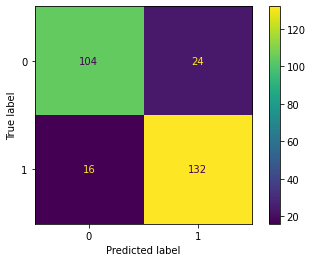

In [87]:
# Plot confusion matrix by passing trained model and test data

from sklearn.metrics import plot_confusion_matrix

model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test)

## Learning Curves - Logistic Regression

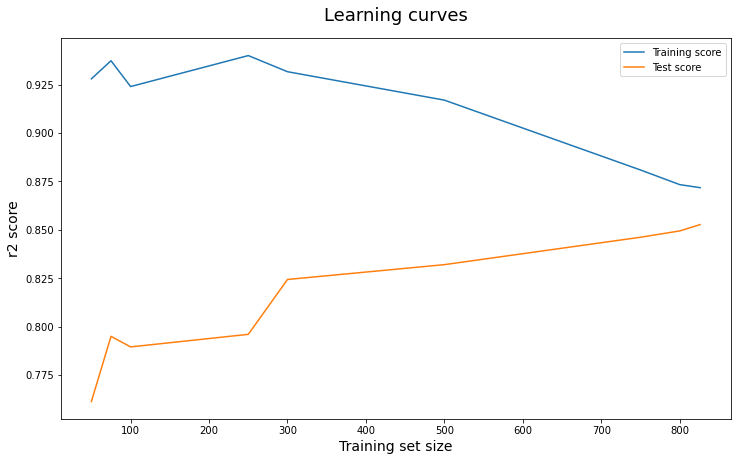

In [38]:
from sklearn.model_selection import learning_curve

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(estimator = LogisticRegression(max_iter=1000),
                                                              X = X, 
                                                              y = y, 
                                                              train_sizes = [50,75,100,250,300,500,750, 800, 826], 
                                                              cv = 10)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.figure(figsize=(12,7))
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
#plt.xlim([0, 1000])
#plt.ylim([0, 1])
plt.legend(); #Good fitting, OK!

## 2. KNN Classifier:

In [89]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision'] )  

accuracy= scores['test_accuracy'].mean()

recall = scores['test_recall'].mean()

precision= scores['test_precision'].mean()

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.8309245102723363
Recall:  0.8696470588235293
Precision:  0.8385203171676412


In [33]:
model.get_params().keys() #lets's check the model parameters for GridSearch()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

## 🎯 Tuning Hyperparameters - GridSearchCV - KNN Classifier

In [34]:
# GridSearch the KNN Classifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


param_grid =  {'n_neighbors': [3,5,7,9,11,13,15,19,25,27,29,31,33,35,39,41,45]}

search_knn = GridSearchCV(model, param_grid=param_grid, 
                              cv=3, n_jobs=-1, verbose=2, scoring='recall')

search_knn.fit(X, y)

print('Best params:', search_knn.best_params_)

print('Best Recall:', search_knn.best_score_)  

Fitting 3 folds for each of 17 candidates, totalling 51 fits
Best params: {'n_neighbors': 9}
Best Recall: 0.8801485091077851


In [90]:
model = search_knn.best_estimator_ # Best model -> k= 29

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision'] )  

accuracy= scores['test_accuracy'].mean()

recall = scores['test_recall'].mean()

precision= scores['test_precision'].mean()

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.8570711896798853
Recall:  0.8851372549019608
Precision:  0.8628521680884897


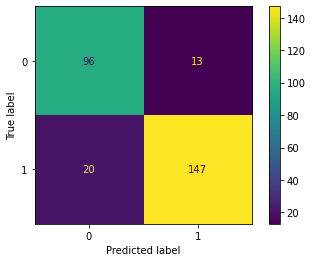

In [55]:
#Confusion Matrix

model.fit(X_train, y_train)

plot_confusion_matrix(model, X_test, y_test)

## 3. Gaussian Naive Bayes Classifier:

In [91]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision'] )  

accuracy= scores['test_accuracy'].mean()

recall = scores['test_recall'].mean()

precision= scores['test_precision'].mean()

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.846225513616818
Recall:  0.8656078431372549
Precision:  0.8639525099299827


## 4. GradientBoosting Classifier:

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'recall', 'precision'] )  

accuracy= scores['test_accuracy'].mean()

recall = scores['test_recall'].mean()

precision= scores['test_precision'].mean()

print('Accuracy: ', accuracy)
print('Recall: ', recall)
print('Precision: ', precision)

Accuracy:  0.8539058767319638
Recall:  0.8676078431372549
Precision:  0.8738074319942299


## 5. Deep Learning - Classification

In [39]:
''' Scikit-Learn'''
from sklearn.model_selection import train_test_split

''' Tensorflow Keras'''
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

In [74]:
# Train test split -> split data into train and test:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

In [75]:
#split train data into train and val in order to create the validation set:

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.7)

In [42]:
#Let's use recall and precision as metrics:

metrics = [
    keras.metrics.Recall(),
    keras.metrics.Precision()
]

In [76]:
def init_model(): #create model
  
    model = models.Sequential()
    
    model.add(layers.Dense(32, input_shape=(18,), activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(1, activation = 'sigmoid'))

    # Model compilation
    
    optimizer = Adam(lr=0.001)

    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=metrics)
    
    return model

In [77]:
model = init_model()

In [78]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                608       
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-traina

In [79]:
#Let's use the EarlyStopping: 

es = EarlyStopping(
    patience=30,
    monitor='val_recall', 
    restore_best_weights=True)

#fit model

history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=16, 
                    callbacks=[es], shuffle=True)

Epoch 1/100
29/29 [==============================] - 1s 14ms/step - loss: 0.6697 - recall: 0.8902 - precision: 0.6279 - val_loss: 0.6069 - val_recall: 1.0000 - val_precision: 0.5745
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6191 - recall: 0.9802 - precision: 0.5812 - val_loss: 0.5609 - val_recall: 1.0000 - val_precision: 0.6171
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5881 - recall: 0.9524 - precision: 0.6234 - val_loss: 0.5269 - val_recall: 0.9722 - val_precision: 0.7241
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.5588 - recall: 0.9286 - precision: 0.6724 - val_loss: 0.4924 - val_recall: 0.9444 - val_precision: 0.8361
Epoch 5/100
29/29 [==============================] - 0s 4ms/step - loss: 0.5443 - recall: 0.9008 - precision: 0.7370 - val_loss: 0.4601 - val_recall: 0.9259 - val_precision: 0.8621
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.4916 - recall: 0.87

In [80]:
def plot_loss_precision_recall_curve(history): #plot curves (loss, recall and precision)
    
    fig, ax =plt.subplots(1,3,figsize=(20,5))
    
    # --- LOSS
    
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(['Train', 'Val'], loc='upper right')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- RECALL

    ax[1].plot(history.history['recall'])
    ax[1].plot(history.history['val_recall'])
    ax[1].set_title('Model recall', fontsize = 18)
    ax[1].set_xlabel('Epoch', fontsize = 14)
    ax[1].set_ylabel('Recall', fontsize = 14)
    ax[1].legend(['Train', 'Val'], loc='lower right') 
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    
    # --- PRECISION
    
    
    ax[2].plot(history.history['precision'])
    ax[2].plot(history.history['val_precision'])
    ax[2].set_title('Model precision', fontsize = 18)
    ax[2].set_xlabel('Epoch', fontsize = 14)
    ax[2].set_ylabel('Precision', fontsize = 14)
    ax[2].legend(['Train', 'Val'], loc='lower right')  
    ax[2].grid(axis="x",linewidth=0.5)
    ax[2].grid(axis="y",linewidth=0.5)    
    
 
    
    plt.show()

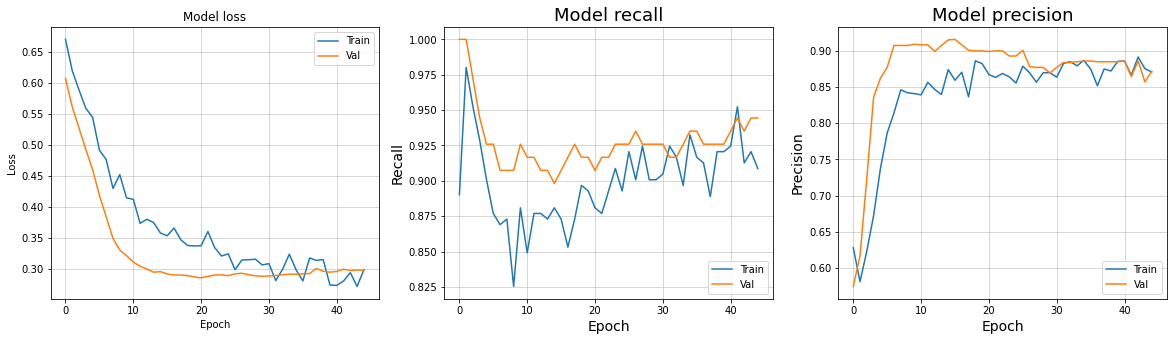

In [81]:
plot_loss_precision_recall_curve(history)

In [82]:
model.evaluate(X_test, y_test, verbose=0, return_dict=True) #model evaluation

{'loss': 0.3460691273212433,
 'recall': 0.912162184715271,
 'precision': 0.849056601524353}